In [23]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [24]:
num_classes = 10
learning_rate = 0.001
training_steps = 200
batch_size = 128
display_step = 10

conv1_filters = 32
conv2_filters = 64
fc1_units = 1024

In [25]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.

In [26]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [31]:
class ConvNet(Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = layers.Conv2D(32, kernel_size=5, activation=tf.nn.relu)
        self.maxpool1 = layers.MaxPool2D(2, strides=2)
        self.cov2 = layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu)
        self.maxpool1 = layers.MaxPool2D(2, strides=2)
        self.conv2 = layers.MaxPool2D(2, strides=2)
        self.maxpool2 = layers.MaxPool2D(2, strides=2)
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(1024)
        self.dropout = layers.Dense(1024)
        self.dropout = layers.Dropout(rate=0.5)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = tf.reshape(x, [-1, 28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x, training=is_training)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x
conv_net = ConvNet()

In [32]:
def cross_entrophy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.optimizers.Adam(learning_rate)

In [33]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = conv_net(x, is_training=True)
        loss = cross_entrophy_loss(pred, y)
    trainable_variables = conv_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [34]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = conv_net(batch_x)
        loss = cross_entrophy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, losss: %f, accuracy: %f" % (step, loss, acc))

step: 10, losss: 2.218032, accuracy: 0.570312
step: 20, losss: 2.061273, accuracy: 0.664062
step: 30, losss: 1.858096, accuracy: 0.812500
step: 40, losss: 1.733186, accuracy: 0.851562
step: 50, losss: 1.653467, accuracy: 0.914062
step: 60, losss: 1.600117, accuracy: 0.929688
step: 70, losss: 1.619779, accuracy: 0.929688
step: 80, losss: 1.622910, accuracy: 0.898438
step: 90, losss: 1.619097, accuracy: 0.914062
step: 100, losss: 1.586297, accuracy: 0.945312
step: 110, losss: 1.586709, accuracy: 0.914062
step: 120, losss: 1.567353, accuracy: 0.937500
step: 130, losss: 1.574030, accuracy: 0.953125
step: 140, losss: 1.548453, accuracy: 0.960938
step: 150, losss: 1.568545, accuracy: 0.921875
step: 160, losss: 1.569515, accuracy: 0.937500
step: 170, losss: 1.532208, accuracy: 0.960938
step: 180, losss: 1.563415, accuracy: 0.953125
step: 190, losss: 1.526916, accuracy: 0.960938
step: 200, losss: 1.539094, accuracy: 0.960938


In [35]:
pred = conv_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.958200


In [36]:
import matplotlib.pyplot as plt

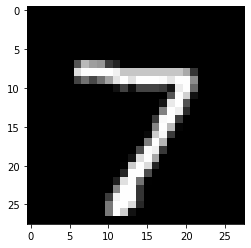

Model prediction: 7


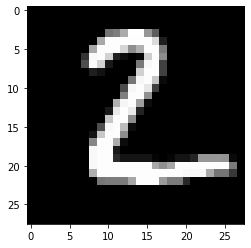

Model prediction: 2


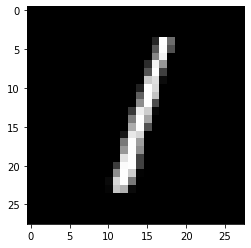

Model prediction: 1


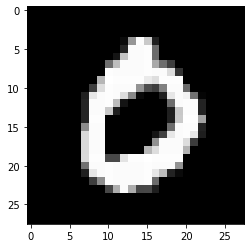

Model prediction: 0


In [38]:
n_images = 5
test_images = x_test[:n_images]
predictions = conv_net(test_images)
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap="gray")
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))